In [4]:
import scipy.io as sio
from fastai.groups.default_cnn import *

pd.options.display.max_rows = 999

In [5]:
PATH = '/data/msnow/data_science/celeb/'

# Imdb Dataset [link here](https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/)

## Load the Data and collect it into Dataframe

In [3]:
meta = sio.loadmat(f'{PATH}imdb/imdb.mat')

In [4]:
meta.keys()

dict_keys(['__header__', '__version__', '__globals__', 'imdb'])

In [5]:
dob = meta['imdb'][0][0][0][0]
photo_taken = meta['imdb'][0][0][1][0]
full_path = [meta['imdb'][0][0][2][0][x][0] for x in range(len(meta['imdb'][0][0][2][0]))]
local_path = [x.split('/')[1] for x in full_path]
gender = meta['imdb'][0][0][3][0]
name = [meta['imdb'][0][0][4][0][x][0] for x in range(len(meta['imdb'][0][0][4][0]))]
celeb_id = meta['imdb'][0][0][9][0]

In [6]:
celeb_df = pd.DataFrame({'dob':dob, 'photo_taken':photo_taken, 'full_path':full_path, 'gender':gender, 'name':name, 'celeb_id':celeb_id, 'local_path':local_path })
celeb_df.sort_values('celeb_id', inplace=True)
celeb_df.head()

,celeb_id,dob,full_path,gender,local_path,name,photo_taken
204234,1,715875,42/nm0704042_rm2073418240_1960-0-0_1983.jpg,1.0,nm0704042_rm2073418240_1960-0-0_1983.jpg,'Lee' George Quinones,1983
204233,1,715875,42/nm0704042_rm2039863808_1960-0-0_1983.jpg,1.0,nm0704042_rm2039863808_1960-0-0_1983.jpg,'Lee' George Quinones,1983
327176,2,715806,48/nm0946148_rm1328200448_1959-10-23_1989.jpg,1.0,nm0946148_rm1328200448_1959-10-23_1989.jpg,'Weird Al' Yankovic,1989
327195,2,715806,48/nm0946148_rm938919424_1959-10-23_2014.jpg,1.0,nm0946148_rm938919424_1959-10-23_2014.jpg,'Weird Al' Yankovic,2014
327194,2,715806,48/nm0946148_rm922142208_1959-10-23_2014.jpg,1.0,nm0946148_rm922142208_1959-10-23_2014.jpg,'Weird Al' Yankovic,2014


In [70]:
celeb_df.loc[204234,'full_path']

'42/nm0704042_rm2073418240_1960-0-0_1983.jpg'

{'02/nm0000002_rm289065984_1924-9-16_1974.jpg'}

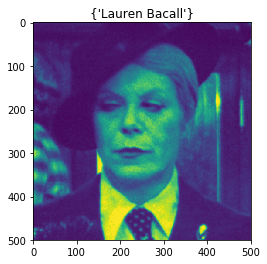

In [78]:
img_sel = 22
img_pth_sel = celeb_df.loc[img_sel,'full_path']
img = plt.imread(f"/data/msnow/data_science/celeb/imdb_crop/{img_pth_sel}")
plt.imshow(img)
plt.title({celeb_df.loc[img_sel,'name']})
{celeb_df.loc[img_sel,'full_path']}

In [ ]:
plt.figure(figsize=(20,10))
for x in range(4):
    fil_name = files[x]
    img = plt.imread(f'{PATH}trn/{fil_name}')
    plt.subplot(1,4,x+1)
    plt.imshow(img,);
    fl_celeb = celeb_df_many.loc[celeb_df_many.local_path==fil_name,'name']
    plt.title(fl_celeb.values[0])
print(img.shape)
print(np.min(img),np.max(img))

In [53]:
celeb_df.shape

(460723, 6)

In [62]:
celeb_df.celeb_id.nunique()

20284

In [59]:
len(set(local_path))/len(local_path)

1.0

### Select only the celebrities with more than a certain number of photos

In [7]:
celeb_id = celeb_df.celeb_id.value_counts().index[celeb_df.celeb_id.value_counts()>100]
celeb_df_many = celeb_df.loc[celeb_df.celeb_id.isin(celeb_id),:].copy()
celeb_id.shape, celeb_df_many.shape

((1109,), (233822, 7))

## Split photos into train, validation and test sets

In [8]:
celeb_df_many.drop(columns='full_path', inplace=True)
celeb_df_many['celeb_ct'] = celeb_df_many.groupby('celeb_id').cumcount()

In [9]:
celeb_df_many

,celeb_id,dob,gender,local_path,name,photo_taken,celeb_ct
367004,4,721541,1.0,nm1265067_rm4026637056_1975-7-6_2003.jpg,50 Cent,2003,0
367000,4,721541,1.0,nm1265067_rm3952080128_1975-7-6_2014.jpg,50 Cent,2014,1
367001,4,721541,1.0,nm1265067_rm3984821760_1975-7-6_2009.jpg,50 Cent,2009,2
367002,4,721541,1.0,nm1265067_rm4002411776_1975-7-6_2014.jpg,50 Cent,2014,3
367003,4,721541,1.0,nm1265067_rm4007243776_1975-7-6_2011.jpg,50 Cent,2011,4
367005,4,721541,1.0,nm1265067_rm4030050048_1975-7-6_2012.jpg,50 Cent,2012,5
367013,4,721541,1.0,nm1265067_rm4254070016_1975-7-6_2014.jpg,50 Cent,2014,6
367007,4,721541,1.0,nm1265067_rm4052743424_1975-7-6_2014.jpg,50 Cent,2014,7
367008,4,721541,1.0,nm1265067_rm4080655616_1975-7-6_2013.jpg,50 Cent,2013,8
367009,4,721541,1.0,nm1265067_rm4103075072_1975-7-6_2014.jpg,50 Cent,2014,9


In [10]:
celeb_df_many['trn_val_tst'] = 0
celeb_df_many.loc[celeb_df_many.celeb_ct<20,'trn_val_tst'] = 2
celeb_df_many.loc[((celeb_df_many.celeb_ct>=20) & (celeb_df_many.celeb_ct<40)),'trn_val_tst'] = 1

In [11]:
(celeb_df_many.trn_val_tst==0).sum(),(celeb_df_many.trn_val_tst==1).sum(),(celeb_df_many.trn_val_tst==2).sum()

(189462, 22180, 22180)

### Separate trn, val and tst photos into separate folders

In [13]:
tst_files = celeb_df_many.loc[celeb_df_many.trn_val_tst==2,'local_path']
tst_files.head()

367004    nm1265067_rm4026637056_1975-7-6_2003.jpg
367000    nm1265067_rm3952080128_1975-7-6_2014.jpg
367001    nm1265067_rm3984821760_1975-7-6_2009.jpg
367002    nm1265067_rm4002411776_1975-7-6_2014.jpg
367003    nm1265067_rm4007243776_1975-7-6_2011.jpg
Name: local_path, dtype: object

In [16]:
trn_files = celeb_df_many.loc[celeb_df_many.trn_val_tst<2,'local_path']
trn_files.head()

366993    nm1265067_rm3777027072_1975-7-6_2013.jpg
366992    nm1265067_rm3741561088_1975-7-6_2005.jpg
366991    nm1265067_rm3726957568_1975-7-6_2013.jpg
366990    nm1265067_rm3724783872_1975-7-6_2005.jpg
366989    nm1265067_rm3716846592_1975-7-6_2008.jpg
Name: local_path, dtype: object

In [17]:
tst_files.to_csv(f'{PATH}tst_files.txt', index=False)
trn_files.to_csv(f'{PATH}trn_files.txt', index=False)

bash command to run to cp files to new folder   
`xargs -a tst_files.txt cp -t ../tst/`
`xargs -a trn_files.txt cp -t ../trn/`

## Explore the datasets

In [19]:
celeb_df_trn = celeb_df_many.loc[celeb_df_many.trn_val_tst<2,['celeb_id','local_path']]
celeb_df_trn.head()

,celeb_id,local_path
366993,4,nm1265067_rm3777027072_1975-7-6_2013.jpg
366992,4,nm1265067_rm3741561088_1975-7-6_2005.jpg
366991,4,nm1265067_rm3726957568_1975-7-6_2013.jpg
366990,4,nm1265067_rm3724783872_1975-7-6_2005.jpg
366989,4,nm1265067_rm3716846592_1975-7-6_2008.jpg


In [26]:
files = os.listdir(f'{PATH}trn')
files[:5]

['nm1265067_rm3777027072_1975-7-6_2013.jpg',
 'nm1265067_rm3741561088_1975-7-6_2005.jpg',
 'nm1265067_rm3726957568_1975-7-6_2013.jpg',
 'nm1265067_rm3724783872_1975-7-6_2005.jpg',
 'nm1265067_rm3716846592_1975-7-6_2008.jpg']

(500, 500, 3)
0 237


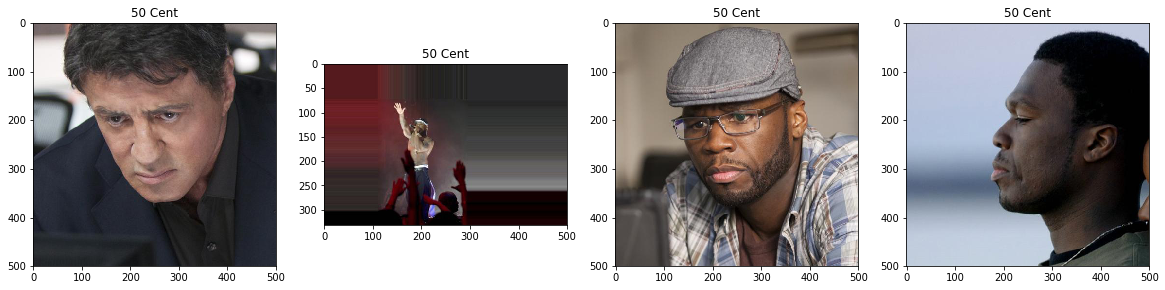

In [63]:
plt.figure(figsize=(20,10))
for x in range(4):
    fil_name = files[x]
    img = plt.imread(f'{PATH}trn/{fil_name}')
    plt.subplot(1,4,x+1)
    plt.imshow(img,);
    fl_celeb = celeb_df_many.loc[celeb_df_many.local_path==fil_name,'name']
    plt.title(fl_celeb.values[0])
print(img.shape)
print(np.min(img),np.max(img))

In [67]:
files[:10]

['nm1265067_rm3777027072_1975-7-6_2013.jpg',
 'nm1265067_rm3741561088_1975-7-6_2005.jpg',
 'nm1265067_rm3726957568_1975-7-6_2013.jpg',
 'nm1265067_rm3724783872_1975-7-6_2005.jpg',
 'nm1265067_rm3716846592_1975-7-6_2008.jpg',
 'nm1265067_rm3708006656_1975-7-6_2005.jpg',
 'nm1265067_rm3657675008_1975-7-6_2005.jpg',
 'nm1265067_rm46041600_1975-7-6_2008.jpg',
 'nm1265067_rm3624120576_1975-7-6_2005.jpg',
 'nm1265067_rm3522083328_1975-7-6_2011.jpg']

In [66]:
celeb_df_many.loc[celeb_df_many.local_path==files[2],'name']

366991    50 Cent
Name: name, dtype: object

# CelebA Dataset [Link Here](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)

In [81]:
PATH = '/data/msnow/data_science/celeb/celeba/'

In [87]:
celeba_id = pd.read_csv(f'{PATH}identity_CelebA.txt', delimiter=' ', names=['img','id'])
celeba_id.head()

,img,id
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295


In [88]:
celeba_id.shape, celeba_id.id.nunique()

((202599, 2), 10177)

In [95]:
(celeba_id.id.value_counts()>10).sum()

8167

# MSceleb Dataset [Link Here](https://www.msceleb.org/)

## Create the image dataset from the tsv files

This code is copied from a separate notebook used to create the images

In [ ]:
import pandas as pd
import base64
import numpy as np
import cv2
from skimage import transform
import io
from PIL import Image
import os

pd.options.display.max_colwidth=100

In [96]:
PATH = '/data/msnow/data_science/celeb/msceleb/'

In [ ]:
# df_names = pd.read_table(f'{PATH}Top1M_MidList.Name.tsv', names=['MID','name'], delimiter='\t')
# df_names_en = df_names.loc[df_names.name.str.contains('@en$'),:].reset_index(drop=True)
# df_names_en['short'] = df_names_en.name.str.replace('@en','')
# df_names_en.short = df_names_en.short.str.replace(' ','_')
# # df_names_en.to_feather(f'{PATH}df_names_feather')
# df_names_en.head()

In [ ]:
df_names_en = pd.read_feather(f'{PATH}df_names_feather')
df_names_en.head()

In [ ]:
df = pd.read_csv(f'{PATH}df_images.csv')
# df = pd.read_table(f'{PATH}FaceImageCroppedWithOutAlignment.tsv', nrows=1058604, delimiter='\t', names=['MID','rank','url','page_url','faceid','FaceRectangle','face_data'])
# df.drop(columns=['rank','page_url','FaceRectangle'], inplace=True)
# # df.to_csv(f'{PATH}df_images.csv',index=False)
df.head()

In [ ]:
# df = pd.read_table(f'{PATH}FaceImageCroppedWithOutAlignment.tsv', nrows=1058604, skiprows=0, delimiter='\t', names=['MID','rank','url','page_url','faceid','FaceRectangle','face_data'])
# df.head()

In [ ]:
df_merge = df.merge(df_names_en,how='left')
df_merge.head()

remove all photos with more than one face in them

In [ ]:
multi_face = df_merge.loc[df_merge.faceid!='FaceId-0','url']
multi_face = multi_face.unique().tolist()
df_merge_one = df_merge.loc[~df_merge.url.isin(multi_face),:]
df_merge_one.shape[0]/df_merge.shape[0]

In [ ]:
df_merge_one['name_ct'] = df_merge_one.groupby('MID').cumcount()
df_merge_one['save_nm'] = df_merge_one.short + '-' + df_merge_one.name_ct.astype(str).str.zfill(4)
df_merge_one.head()

In [ ]:
many_ct = df_merge_one.loc[df_merge_one.name_ct==30,'MID'].tolist()
df_many = df_merge_one.loc[df_merge_one.MID.isin(many_ct),:]
df_many.shape

Export images from `face_data`

In [ ]:
for i,v in df_many.iterrows():
    savePath = os.path.join(PATH,'images',f'{v.save_nm}.jpg')
    with open(savePath, 'wb') as f:
        f.write(base64.b64decode(v.face_data)) 

Export the file names

In [ ]:
df_save = df_many.loc[:,['MID','url','short','name_ct','save_nm']]
df_save.to_csv(f'{PATH}msceleb_img_ref.csv',index=False)

## EDA

In [6]:
PATH = '/data/msnow/data_science/celeb/msceleb/'

In [14]:
msceleb = pd.read_csv(f'{PATH}msceleb_img_ref.csv')
msceleb.head()

,MID,url,short,name_ct,save_nm
0,m.0107_f,http://getbeatmadrid.files.wordpress.com/2013/...,Magic_Alex,0,Magic_Alex-0000
1,m.0107_f,http://1.bp.blogspot.com/-HNFIL7eKdNs/TxnlvZvi...,Magic_Alex,1,Magic_Alex-0001
2,m.0107_f,http://www.magicalex.cz/wp-content/gallery/kou...,Magic_Alex,2,Magic_Alex-0002
3,m.0107_f,http://2.bp.blogspot.com/_71dhc6LM1i4/SBSPDqHt...,Magic_Alex,3,Magic_Alex-0003
4,m.0107_f,http://www.magicalex.cz/wp-content/uploads/201...,Magic_Alex,4,Magic_Alex-0004


In [103]:
msceleb.short.value_counts()

Leelee_Sobieski                                        128
Nia_Peeples                                            127
Kathleen_Turner                                        127
Rose_McGowan                                           125
Jessica_Lowndes                                        125
Daniel_Radcliffe                                       124
Julie_Delpy                                            124
Terry_Farrell                                          124
Kate_Linder                                            124
Doris_Roberts                                          124
Yang_Rui                                               124
Olympia_Dukakis                                        124
Laurie_Holden                                          123
Lena_Olin                                              123
Jeremy_Sumpter                                         123
Kelly_Preston                                          123
Christina_Applegate                                    1

Display some images

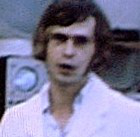

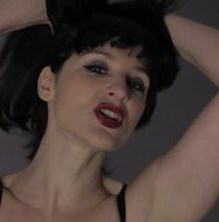

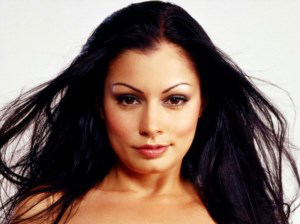

In [111]:
for img_number in [0,100,1000]:
    img = Image.open(f'{PATH}images/{msceleb.save_nm[img_number]}.jpg')
    display(img)

Add image sizes to dataframe

Here is the code used to create the file with the image dimensions

````bash
find -type f -print0 | xargs -0 identify -format "%t | %w | %h \n" > ../dim.txt
````

In [22]:
msceleb_dim = pd.read_table(f'{PATH}dim.txt', delimiter='|', names=['save_nm', 'width', 'height'])
msceleb_dim.save_nm = msceleb_dim.save_nm.str.replace('\s','')
msceleb_dim.head()

,save_nm,width,height
0,William_Labov-0015,219,240
1,Emily_Bindiger-0003,242,300
2,Taylor_Caldwell-0024,300,287
3,Eiji_Toyoda-0089,140,164
4,Louis_B._Mayer-0042,219,300


In [16]:
msceleb_dim.shape, msceleb.shape

((890870, 3), (890870, 5))

In [23]:
msceleb.save_nm[571170], msceleb_dim.save_nm[0]

('William_Labov-0015', 'William_Labov-0015')

In [19]:
msceleb.loc[msceleb.save_nm.str.contains('William_Labov-0015'),:]

,MID,url,short,name_ct,save_nm
571170,m.01v8r4,http://www.meertens.nl/meertensnet/file/edwinb...,William_Labov,15,William_Labov-0015


In [27]:
msceleb = msceleb.merge(msceleb_dim, on='save_nm')
msceleb.head()

,MID,url,short,name_ct,save_nm,width,height
0,m.0107_f,http://getbeatmadrid.files.wordpress.com/2013/...,Magic_Alex,0,Magic_Alex-0000,140,137
1,m.0107_f,http://1.bp.blogspot.com/-HNFIL7eKdNs/TxnlvZvi...,Magic_Alex,1,Magic_Alex-0001,170,179
2,m.0107_f,http://www.magicalex.cz/wp-content/gallery/kou...,Magic_Alex,2,Magic_Alex-0002,257,300
3,m.0107_f,http://2.bp.blogspot.com/_71dhc6LM1i4/SBSPDqHt...,Magic_Alex,3,Magic_Alex-0003,107,133
4,m.0107_f,http://www.magicalex.cz/wp-content/uploads/201...,Magic_Alex,4,Magic_Alex-0004,257,300


In [118]:
# img_wd = []
# img_ht = []
# for v in msceleb.save_nm:
#     img = Image.open(f'{PATH}images/{v}.jpg')
#     wd, ht = img.size
#     img_wd.append(wd)
#     img_ht.append(ht)
# msceleb['width'] = img_wd
# msceleb['height'] = img_ht
# msceleb.head()

,MID,url,short,name_ct,save_nm,width,height
0,m.0107_f,http://getbeatmadrid.files.wordpress.com/2013/...,Magic_Alex,0,Magic_Alex-0000,140,137
1,m.0107_f,http://1.bp.blogspot.com/-HNFIL7eKdNs/TxnlvZvi...,Magic_Alex,1,Magic_Alex-0001,170,179
2,m.0107_f,http://www.magicalex.cz/wp-content/gallery/kou...,Magic_Alex,2,Magic_Alex-0002,257,300
3,m.0107_f,http://2.bp.blogspot.com/_71dhc6LM1i4/SBSPDqHt...,Magic_Alex,3,Magic_Alex-0003,107,133
4,m.0107_f,http://www.magicalex.cz/wp-content/uploads/201...,Magic_Alex,4,Magic_Alex-0004,257,300


In [28]:
msceleb.width.min(), msceleb.height.min()

(47, 48)

## Create folders for training and testing images

Start with the 100 celebrities with the most picutres

In [37]:
# celeb_100_list = msceleb.short.value_counts()[msceleb.short.value_counts()>=100].index.tolist()
celeb_100_list = msceleb.short.value_counts().index[:100].tolist()
msceleb_100 = msceleb.loc[msceleb.short.isin(celeb_100_list),:]
msceleb_100.save_nm = msceleb_100.save_nm.str.replace("\'","")
msceleb.shape, msceleb_100.shape

/data/msnow/miniconda3/envs/data_sci/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


((890870, 7), (11927, 7))

In [38]:
msceleb_trn = msceleb_100.loc[msceleb_100.name_ct>20,['save_nm','short','name_ct']].reset_index(drop=True)
msceleb_tst = msceleb_100.loc[msceleb_100.name_ct<=20,['save_nm','short','name_ct']].reset_index(drop=True)
msceleb_trn.save_nm = msceleb_trn.save_nm + '.jpg'
msceleb_tst.save_nm = msceleb_tst.save_nm + '.jpg'
msceleb_trn.shape, msceleb_tst.shape

((9827, 3), (2100, 3))

In [39]:
msceleb_trn.to_csv(f'{PATH}trn_dataset.csv',index=False)
msceleb_trn.save_nm.to_csv(f'{PATH}trn_img_list.csv',index=False)
msceleb_tst.save_nm.to_csv(f'{PATH}tst_img_list.csv',index=False)

Here are the bash commands used to copy the files
````bash
xargs -a ../tst_img_list.csv cp -t ../tst/
xargs -a ../tst_img_list.csv cp -t ../trn/
````

Also, here are the bash commands used to remove the single quote from the file names (which messed up xargs)

````bash
rename \' "" *
````

In [153]:
msceleb_trn.head()

,save_nm,short,name_ct
0,Adam_Carolla-0021.jpg,Adam_Carolla,21
1,Adam_Carolla-0022.jpg,Adam_Carolla,22
2,Adam_Carolla-0023.jpg,Adam_Carolla,23
3,Adam_Carolla-0024.jpg,Adam_Carolla,24
4,Adam_Carolla-0025.jpg,Adam_Carolla,25


In [40]:
val_idx = msceleb_trn.index[msceleb_trn.name_ct<=41].tolist()
len(val_idx)

2100

## Initial Model Settings and Exploration

In [41]:
arch = resnet34
sz = 32
bs = 64

In [42]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_basic, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'trn', f'{PATH}trn_dataset.csv', tfms=tfms,
                    val_idxs=val_idx, test_name='tst', bs=bs, cat_separator='|')

In [43]:
data_o = get_data(sz,bs)

In [44]:
data = data_o.resize(int(sz*1.3), 'tmp')

In [45]:
learn = ConvLearner.pretrained(arch, data)

In [46]:
learn.crit

<function torch.nn.functional.nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True)>

In [47]:
data.val_ds.y.shape

(2100,)

In [48]:
x,y = next(iter(data.val_dl))

In [49]:
y.shape

torch.Size([64])

In [180]:
len(data.classes)

1187

Find the optimal learning rate

In [51]:
lrf=learn.lr_find()

 95%|█████████▌| 115/121 [04:01<00:12,  2.10s/it, loss=12.4]

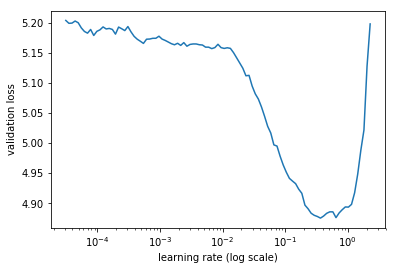

In [52]:
learn.sched.plot()

In [53]:
min_arg = np.argmin(learn.sched.losses)
learn.sched.lrs[min_arg]

0.36474006492530109

In [54]:
lr = 4e-2
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

  1%|          | 1/121 [00:03<07:55,  3.96s/it, loss=5.29]
epoch      trn_loss   val_loss   accuracy                   
    0      4.236371   3.709873   0.155714  
    1      3.835641   3.424888   0.190952                   
    2      3.491164   3.353643   0.209048                   
    3      3.546074   3.316765   0.211429                   
    4      3.359995   3.212857   0.238095                   
    5      3.20754    3.178687   0.246667                   
    6      3.079511   3.17265    0.24619                    



[3.1726500733693439, 0.24619047627562568]